# Tensorflow 용어

1. Operation
    - 그래프 상의 노드는 op로 불림
    - 하나 이상의 텐서를 받을 수 있음
    - 계산을 수행하고 결과로 하나 이상의 텐서로 반환할 수 있음
2. Tensor
    - 내부적으로 모든 데이터는 텐서를 통해서 표현됨
    - 텐서는 일종의 다차원 배열인데, 그래프 내의 오퍼레이션 간에는 텐서만이 전달됨
3. Session
    - 그래프를 실행하기 위해서는 세션 객체가 필요함
    - 세션은 오퍼레이션의 실행 환경을 캡슐화한 것임
4. Variable
    - 변수는 그래프의 실행 시, 파라미터를 저장하고 갱신하는데 사용됨
    - 메모리 상에서 텐서를 저장하는 버퍼 역할을 함

---

# 1. 간단한 테스트

In [10]:
import tensorflow as tf

hello = tf.constant('Hello, Tensorflow!')
sess = tf.Session()
print(sess.run(hello))

a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a + b))

b'Hello, Tensorflow!'
42


# 2. 텐서플로우 데이터형
1. Placeholder
2. Variable
3. Constant

## 2-1 Constant

In [13]:
import tensorflow as tf

# tf.constant 상수
hello = tf.constant('Hello, Tensorflow!')
print(hello)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)
print(c)

# 위에서 변수와 수식들을 정의했지만 실행이 정의한 시점에서 실행되는 것은 아님
# 다음처럼 Session 객체와 run 메소드를 사용할 때 계산됨
# 따라서 모델을 구성하는 것과 실행하는 것을 분리하여 프로그램을 깔끔하게 작성할 수 있음
# 그래프를 실행할 세션을 구성함
sess = tf.Session()
print(sess.run(hello))
print(sess.run([a, b, c]))

sess.close()

Tensor("Const_10:0", shape=(), dtype=string)
Tensor("Add_4:0", shape=(), dtype=int32)
b'Hello, Tensorflow!'
[10, 32, 42]


## 2-2 Variable

In [26]:
import tensorflow as tf

# tf.placeholder 계산을 실행할 때 입력 값을 받는 변수로 사용함
# None은 크기가 정해지지 않았음을 의미함
X = tf.placeholder(tf.float32, [None, 3])
print(X)

# X 플레이스홀더에 넣을 값입니다.
# 플레이스홀더에서 설정한 것처럼 두번째 차원의 요소 갯수는 3개임
x_data = [
    [1, 2, 3],
    [4, 5, 6]
]

# tf.Variable: 그래프를 계산하면서 최적화할 변수들임. 이 값이 신경망을 좌우하는 값들임.
# tf.random_normal: 각 변수들의 초기값을 정규분포 랜덤 값으로 초기화함.
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([2, 1]))

# 입력값과 변수들을 계산할 수식을 작성함
# tf.matmul 처럼 mat*로 되어 있는 함수로 행렬 계산을 수행함
expr = tf.matmul(X, W) + b

sess = tf.Session()
# 위에서 설정한 Variable들의 값들을 초기화하기 위해
# 처음에 tf.global_variables_initializer를 한번 실행해야함
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
# expr 수식에는 X라는 입력값이 필요함
# 따라서 expr 실행 시에는 이 변수에 대한 실제 입력값을 다음처럼 넣어줘야함

print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

Tensor("Placeholder_10:0", shape=(?, 3), dtype=float32)
=== x_data ===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-0.11711758 -0.11156276]
 [ 0.8473318   0.4438187 ]
 [-0.30991387 -0.02535409]]
=== b ===
[[2.4240634 ]
 [0.58892447]]
=== expr ===
[[3.071868  3.124076 ]
 [2.49763   2.2096424]]


# 3. Linear Regression

In [53]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [2, 4, 6]

# W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
# b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# name: 나중에 텐서보드 등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줌
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

# X와 Y의 상관 관계를 분석하기 위한 가설 수식(Hypothesis)을 작성함
# y = W * x + b
# W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 기호를 사용했음
hypothesis = W * X + b

# Loss function을 작성
# mean(h - Y)^2 : 예측값과 실제값의 거리를 cost 함수로 정의함
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 gradient descent 를 수행함
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# cost function을 최소화하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화함
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 최적화를 100번 수행함
    for step in range(100000):
        # sess.run을 통해 train_op와 cost 그래프를 계산함
        # 이 때, 가설 수식에 넣어야할 실제값을 feed_dict을 통해 전달함
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
        
#         print(step, cost_val, sess.run(W), sess.run(b))
        
    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봄
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

Tensor("X_26:0", dtype=float32)
Tensor("Y_26:0", dtype=float32)

=== Test ===
X: 5, Y: [10.]
X: 2.5, Y: [5.]


# 4. Classification

In [57]:
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 1]
    ]
)

# [기타, 포유류, 조류]
# 다음과 같은 형식을 one-hot 형식의 데이터라고 함
y_data = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1]
    ]
)

##########
### NN ###
##########

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 신경망은 2차원적으로 [입력층(특성), 출력층(레이블)]->[2, 3]으로 정의함
W = tf.Variable(tf.random_uniform([2, 3], -1., 1.))

# 편향은 각 레이어의 아웃풋 갯수로 설정
# 편향은 아웃풋의 갯수, 즉 최종 결과값의 분류 갯수인 3으로 설정
b = tf.Variable(tf.zeros([3]))

# 신경망의 가중치 W와 편향 b를 적용
L = tf.add(tf.matmul(X, W), b)
# 가중치와 편향을 이용해 계산한 결과 값에
# 텐서플로우에서 기본적으로 제공하는 활성화 함수인 ReLU 함수를 적용
L = tf.nn.relu(L)

# 마지막으로 softmax 함수를 이용하여 출력값을 사용하기 쉽게 만듦
# softmax 함수는 다음처럼 결과값을 전체합이 1인 확률로 만들어주는 함수
model = tf.nn.softmax(L)

# 최적화를 위해서 cost function을 작성
# 각 개별 결과에 대한 합을 구한 뒤 평균을 내는 방식을 사용함
# 전체 합이 아닌 개별 결과를 구한 뒤 평균을 내는 방식을 사용하기 위해 axis 옵션을 사용
# axis 옵션이 없으면 -1.09 처럼 총합인 스칼라값으로 출력됨
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)


##########
# 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(10000):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
#     if(step + 1) % 10 == 0:
#         print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        
##########
# 결과확인
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print("예측값:", sess.run(prediction, feed_dict={X: x_data}))
print("실제값:", sess.run(target, feed_dict={Y: y_data}))

is_corret = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_corret, tf.float32))
print("정확도: %.2f" % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

예측값: [2 2 2 2 2 2]
실제값: [0 1 2 0 0 2]
정확도: 33.33


# 5. Deep NN

In [79]:
# import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 1]
    ]
)

# [기타, 포유류, 조류]
# 다음과 같은 형식을 one-hot 형식의 데이터라고 함
y_data = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1]
    ]
)

##########
### NN ###
##########
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 첫번째 가중치의 차원은 [특성, 히든 레이어의 뉴런갯수] -> [2, 10]으로 정의함
W1 = tf.Variable(tf.random_uniform([2, 100], -1., 1.))
# 두번째 가중치의 차원을 [첫번째 히든레이어의 뉴런 갯수, 분류 갯수] -> [10, 3]으로 설정함
W2 = tf.Variable(tf.random_uniform([100, 3], -1., 1.))

# 편향을 각 레이어의 아웃풋 갯수로 정함
b1 = tf.Variable(tf.zeros([100]))
b2 = tf.Variable(tf.zeros([3]))

# 신경망의 히든 레이어에 가중치 W1과 편향 b1을 적용함
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

# 최종적인 아웃풋을 계산
# 히든레이어에 두번째 가중치 W2와 편향 b2를 적용하여 3개의 출력값을 만들어냄
model = tf.add(tf.matmul(L1, W2), b2)

# 텐서플로우에서 기볹거으로 제공되는 크로스엔트로피 함수를 이용해
# 복잡한 수식을 사용하지 않고도 최적화를 위한 비용 함수를 다음처럼 간단하게 적용할 수 있음
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

##########
# 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    if(step+1) % 10 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        
#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print("예측값:", sess.run(prediction, feed_dict={X: x_data}))
print("실제값:", sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도: %.2f" % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

10 0.27881378
20 0.08105924
30 0.023550145
40 0.009695139
50 0.005532933
60 0.0038555816
70 0.0030076497
80 0.0024916385
90 0.002132315
100 0.0018580946
예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


# 6. CNN-CNN

In [81]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot= True)

################
# 신경망 모델 구성

# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듦
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 각각의 변수와 레이어는 다음과 같은 형태로 성성됨
# W1 [3 3 1 32] -> [3 3]: 커널크기, 1 : 입력값 X의 특성 수, 32:필터 갯수
# L1 Conv shape = (?, 28, 28, 32)
# Pool -> (?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있음
# padding='SAME'은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling 역시 tf.nn.max_pool을 이용하여 쉽게 구성할 수 있음
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
# Pool -> (?, 7, 7, 64)
# W2의 [3, 3, 32, 64]에서 32는 L1에서 출력된 W1의 마지막 차원, 필터의 크기
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

# FC레이어: 입력값 7x7x64 -> 출력값 256
# Fully connected를 위해 직전의 Pool사이즈인 (?, 7, 7, 64)를 참고하여 차원을 줄여줌
# Reshape -> (?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

W0725 14:15:21.410708 139830860023616 deprecation.py:323] From <ipython-input-81-6115b6ab5014>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0725 14:15:21.412244 139830860023616 deprecation.py:323] From /home/wangyu/miniconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0725 14:15:21.413583 139830860023616 deprecation.py:323] From /home/wangyu/miniconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is dep

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0725 14:15:23.080940 139830860023616 deprecation.py:323] From /home/wangyu/miniconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0725 14:15:23.085375 139830860023616 deprecation.py:323] From /home/wangyu/miniconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


W0725 14:15:23.792952 139830860023616 deprecation.py:323] From /home/wangyu/miniconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0725 14:15:23.949282 139830860023616 deprecation.py:506] From <ipython-input-81-6115b6ab5014>:44: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch: 0001 Avg. cost = 0.362
Epoch: 0002 Avg. cost = 0.113
Epoch: 0003 Avg. cost = 0.080
Epoch: 0004 Avg. cost = 0.064
Epoch: 0005 Avg. cost = 0.052
Epoch: 0006 Avg. cost = 0.044
Epoch: 0007 Avg. cost = 0.038
Epoch: 0008 Avg. cost = 0.032
Epoch: 0009 Avg. cost = 0.029
Epoch: 0010 Avg. cost = 0.026
Epoch: 0011 Avg. cost = 0.022
Epoch: 0012 Avg. cost = 0.022
Epoch: 0013 Avg. cost = 0.020
Epoch: 0014 Avg. cost = 0.018
Epoch: 0015 Avg. cost = 0.015
최적화 완료!
정확도: 0.9898


In [ ]:
# 신경망 구성을 손쉽게 해 주는 유틸리티 모음인 tensorflow.layers 를 사용해봅니다.
# 01 - CNN.py 를 재구성한 것이니, 소스를 한 번 비교해보세요.
# 이처럼 TensorFlow 에는 간단하게 사용할 수 있는 다양한 함수와 유틸리티들이 매우 많이 마련되어 있습니다.
# 다만, 처음에는 기본적인 개념에 익숙히지는 것이 좋으므로 이후에도 가급적 기본 함수들을 이용하도록 하겠습니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 활성화 함수 적용은 물론, 컨볼루션 신경망을 만들기 위한 나머지 수치들은 알아서 계산해줍니다.
# 특히 Weights 를 계산하는데 xavier_initializer 를 쓰고 있는 등,
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3, 3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1, 0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3, 3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)

model = tf.layers.dense(L3, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          is_training: True})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   is_training: False}))

# 7. Decaying E-greedy - DQN 활용

Final DQN
Qs
Success Rate:  0.0007


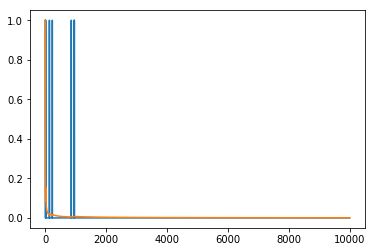

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import random
import tensorflow as tf

def one_hot_encoder(state_in):
    return np.identity(16)[state_in:state_in + 1]

env = gym.make("FrozenLake-v0")
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.7

X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpredict = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Y - Qpredict))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

num_episodes = 10000
e = 0.2
r = 0.9
rList = []
successRate = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = None
        local_loss = []
        while not done:
            Qs = sess.run(Qpredict, feed_dict={X:one_hot_encoder(state)})
            
            rand = random.random()
            if(rand < e / (i / 50 + 10)):
                action = env.action_space.sample()
            else:
                action = np.argmax(Qs)
                
            new_state, reward, done, _ = env.step(action)
            if done:
                Qs[0, action] = reward
            else:
                new_Qs = sess.run(Qpredict, feed_dict={X:one_hot_encoder(new_state)})
                Qs[0:action] = reward + r * np.max(new_Qs)
            sess.run(train, feed_dict={X:one_hot_encoder(state), Y:Qs})
            total_reward += reward
            state = new_state
        rList.append(total_reward)
        successRate.append(sum(rList) / (i + 1))
        
print("Final DQN")
print("Qs")
print("Success Rate: ", successRate[-1])
plt.plot(range(len(rList)), rList)
plt.plot(range(len(successRate)), successRate)
plt.show()